In [1]:
import numpy as np
from SessionData import *
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [2]:
mouse_id = "7001"
session_id = "v8"
experiment = "clickbait-visual"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")
    

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    #base_path="S:\\clickbait-visual\\kilosorted",  # Adjust path as needed
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7001_v8...
Successfully loaded spike_times from S:\clickbait-visual\kilosorted\7001\v8\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-visual\kilosorted\7001\v8\spike_templates.npy
Successfully loaded templates from S:\clickbait-visual\kilosorted\7001\v8\templates.npy
Successfully loaded sniff from S:\clickbait-visual\preprocessed\7001\v8\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-visual\bonsai_align\7001\v8\events.csv
Loaded 45 clusters for 7001_v8
Loaded sniff data: 3640180 samples


Created population matrix: 45 neurons x 100 time bins
Time range: 500000.0 - 505000.0 ms
Bin size: 50 ms


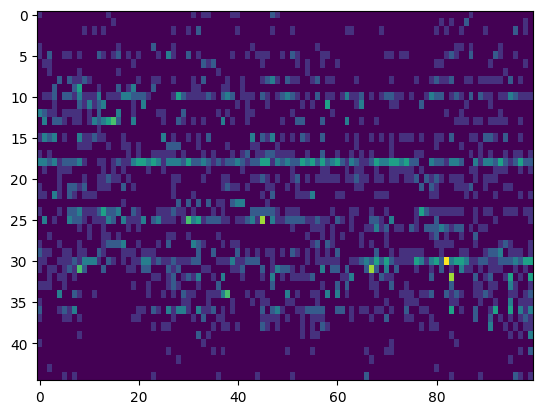

In [3]:
start_time=1000*500
end_time=start_time+5000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=False,
    cluster_ids=None
)

plt.imshow(pop_matrix, aspect='auto')

### Sniff

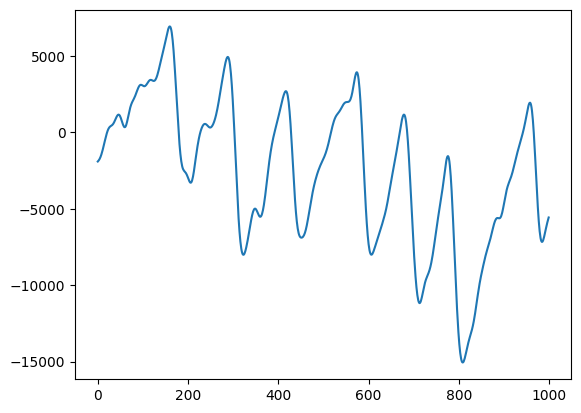

In [4]:
plt.plot(data.sniff[start_time+2000:start_time+3000:1])

### PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=5)

scaled_data = scaler.fit_transform(pop_matrix[:,:])
scores = pca.fit_transform(scaled_data.T)

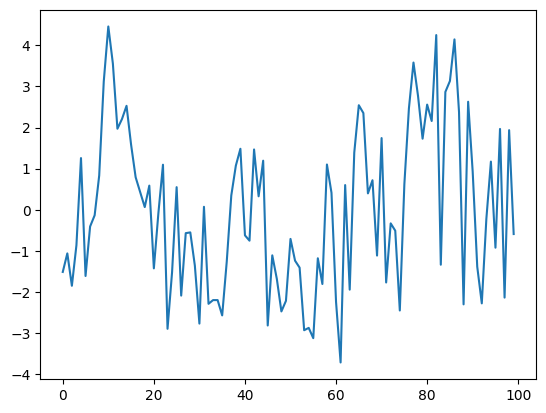

In [6]:
plt.plot(scores[:,0])

In [7]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')



Filtered from 45 to 32 clusters using: best_channel <= 16
Filtered from 45 to 13 clusters using: best_channel > 16


### CCA

In [55]:
ob_clusters = data.filter_clusters('best_channel < 16')
ob_clusters_1 = ob_clusters.filter_clusters('best_channel <= 8')
ob_clusters_2 = ob_clusters.filter_clusters('best_channel > 8')

Filtered from 45 to 32 clusters using: best_channel < 16
Filtered from 32 to 12 clusters using: best_channel <= 8
Filtered from 32 to 20 clusters using: best_channel > 8


In [60]:
from sklearn.cross_decomposition import CCA

start = 0
end = 1000
ms = 1000
bin_size = 500

hc_pop_matrix, hc_time_bins, hc_included_clusters = ob_clusters_1.create_population_raster(
    start_time=start*ms,           # Start at 0 ms
    end_time=end*ms,         # End at 10 seconds (10000 ms)
    bin_size_ms=bin_size,        # 100 ms bins
    zscore_neurons=False,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

ob_pop_matrix, ob_time_bins, ob_included_clusters = ob_clusters_2.create_population_raster(
    start_time=start*ms,           # Start at 0 ms
    end_time=end*ms,         # End at 10 seconds (10000 ms)
    bin_size_ms=bin_size,        # 100 ms bins
    zscore_neurons=False,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

X = hc_pop_matrix.T  # Shape: (time_bins, neurons)
Y = ob_pop_matrix.T  # Shape: (time_bins, neurons)

cca = CCA(n_components=3)  # Number of canonical components
X_c, Y_c = cca.fit_transform(X, Y)

Created population matrix: 12 neurons x 2000 time bins
Time range: 0.0 - 1000000.0 ms
Bin size: 500 ms
Created population matrix: 20 neurons x 2000 time bins
Time range: 0.0 - 1000000.0 ms
Bin size: 500 ms


In [64]:
drinking_colors = ob_clusters.create_event_colormap(ob_time_bins, 'drinking', 'any')

Created color map from 'drinking' using 'any' aggregation
Value range: 0.000 to 1.000


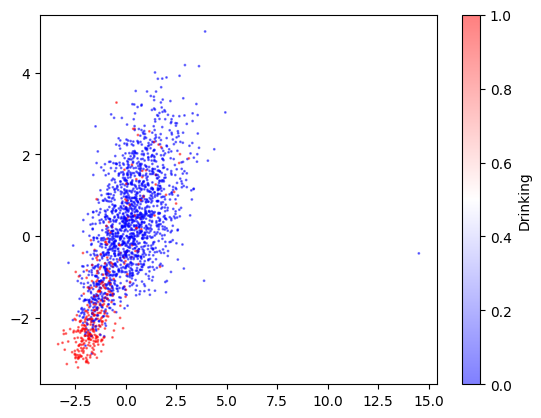

In [66]:
scatter = plt.scatter(X_c[:,0], Y_c[:,0], c=drinking_colors, alpha=0.5, s=1, cmap='bwr')
plt.colorbar(scatter, label='Drinking')


In [11]:
data.clusters[0]['spike_times'][-10:]

array([3636637.13333333, 3636750.73333333, 3636755.83333333,
       3636917.1       , 3637125.63333333, 3637328.56666667,
       3637877.83333333, 3638204.86666667, 3638919.33333333,
       3640110.16666667])

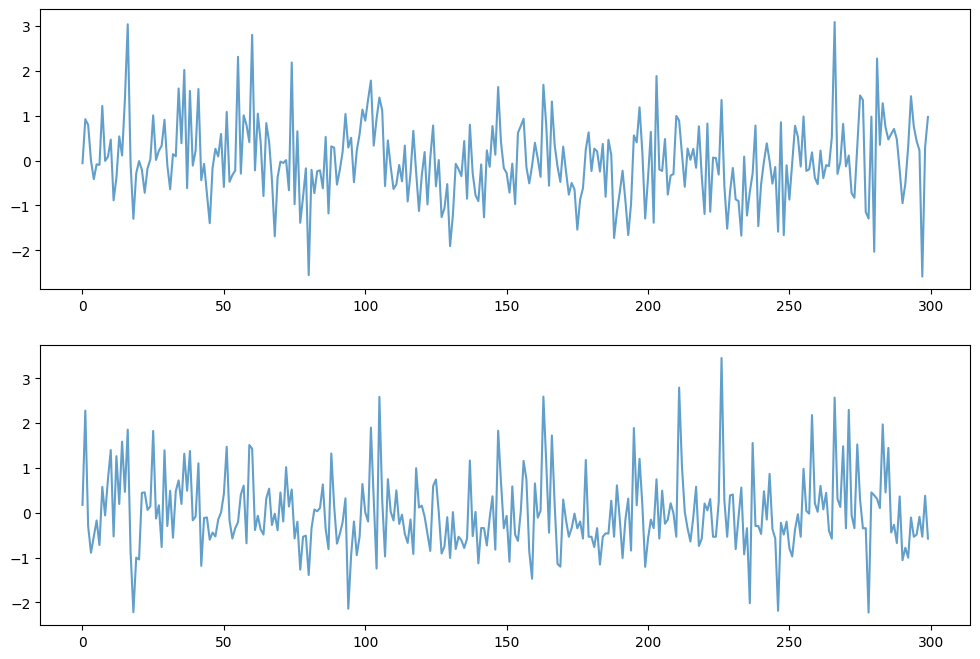

In [12]:
# X_c and Y_c are your canonical components from CCA
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot first few canonical components for both datasets

axes[0].plot(X_c[:, 0], label=f'X_canonical_{0+1}', alpha=0.7)
axes[1].plot(Y_c[:, 0], label=f'Y_canonical_{0+1}', alpha=0.7)

### Events

In [13]:
data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,reward_state,water_left,water_right,click,speed,direction,drinking,timestamp_ms
0,0,2025-04-11 16:35:38.054489600,False,False,694,1467,37.0,False,True,False,False,False,0.000000,0.000000,False,8360
1,0,2025-04-11 16:35:38.082636800,False,False,697,1462,37.0,False,True,False,False,False,5.830952,1.570751,False,8394
2,0,2025-04-11 16:35:38.107084800,False,False,699,1465,37.0,False,True,False,False,False,3.605551,0.982794,False,8427
3,0,2025-04-11 16:35:38.142118400,False,False,697,1467,37.0,False,True,False,False,False,2.828427,0.000031,False,8460
4,0,2025-04-11 16:35:38.166732800,False,False,695,1469,37.0,False,True,False,False,False,2.828427,0.000031,False,8494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108790,36,2025-04-11 17:36:04.762995200,False,False,544,1272,62.0,False,False,False,False,False,4.242640,0.000046,False,3634686
108791,36,2025-04-11 17:36:04.800128000,False,False,543,1277,62.0,False,False,False,False,False,5.099020,0.000076,False,3634719
108792,36,2025-04-11 17:36:04.832153600,False,False,538,1289,62.0,False,False,False,False,False,13.000000,0.000183,False,3634752
108793,36,2025-04-11 17:36:04.863500800,False,False,536,1302,62.0,False,False,False,False,False,13.152946,0.000198,False,3634786


### Alignment Inspection

In [14]:
from scipy.signal import decimate

reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
reward_raw = np.load(reward_path)
reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

In [15]:
# Covert voltages to bool
start = data.events['timestamp_ms'][0]
reward_bool = np.zeros_like(reward_1khz)
reward_idx = np.where(reward_1khz > 0)
reward_bool[reward_idx] = 1
reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
reward_transition = np.where(np.diff(reward_bool) == 1)[0]
reward_transition[0] # First reward state transition

210271

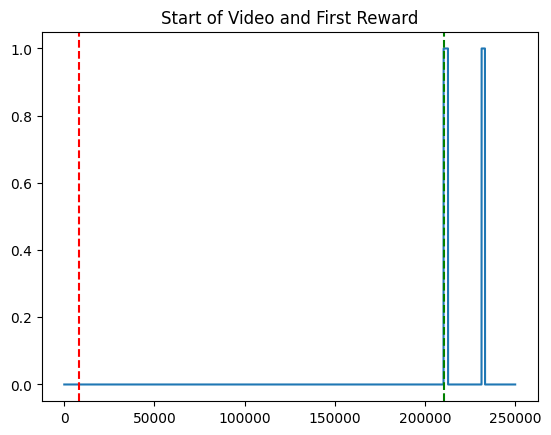

In [16]:
# Preview reward state boolean
plt.plot(reward_bool[:1000*250])
plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
plt.axvline(reward_transition[0], color='g', linestyle='--')
plt.title('Start of Video and First Reward')
plt.show()

In [18]:
# Pick a transition to check
reward_state_transition = reward_transition[-1]
print(reward_state_transition)

3097733


In [19]:
# Check for reward state transition in events dataframe
data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,reward_state,water_left,water_right,click,speed,direction,drinking,timestamp_ms
92678,35,2025-04-11 17:27:07.638899200,False,False,462,1099,32.0,False,False,False,False,False,23.345236,1.570552,False,3097620
92679,35,2025-04-11 17:27:07.674150400,False,False,482,1080,32.0,False,False,False,False,False,27.586229,1.570491,False,3097653
92680,35,2025-04-11 17:27:07.703910400,False,False,495,1065,32.0,False,False,False,False,False,19.849434,1.570598,False,3097687
92681,35,2025-04-11 17:27:07.738905600,False,False,498,1053,32.0,False,False,False,False,False,12.369317,1.570751,False,3097720
92682,35,2025-04-11 17:27:07.771289600,False,False,503,1039,NaN,False,True,False,False,True,14.866069,1.570720,False,3097753
92683,35,2025-04-11 17:27:07.808025600,False,False,514,1023,NaN,False,True,False,False,True,19.416489,1.570628,False,3097787
92684,35,2025-04-11 17:27:07.838412800,False,False,525,1007,NaN,False,True,False,False,True,19.416489,1.570628,False,3097820
92685,35,2025-04-11 17:27:07.877337600,False,False,535,991,NaN,False,True,False,False,False,18.867962,1.570644,False,3097853
